In [104]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

import numpy as np
import numpy.linalg as la
import numpy.random as rand
import math as m

In [7]:
import sys
sys.path.append("C:/AFIT/Courses/Optimization/CostFuncs/ctf")
from ctf.functionsnd import Rosenbrock

In [47]:
class differentialEvol:
    def __init__(self, dim, nParts, cost_f, **kwargs ):
        self.nParts = nParts
        init_range = 10.
        self.f = cost_f
        self.costs = np.zeros(nParts)
        init_locs = False
        for name,value in kwargs.items():
            if name == "start_locs":
                init_locs = true
                self.locs = value
            if name == "init_range":
                init_range = value
        if not init_locs:
            self.locs = rand.rand(dim,nParts)*init_range*2. - init_range
        for i in range(nParts):
            self.costs[i] = self.f(self.locs[:,i])
    
    def iterate(self):
        for i in range(self.nParts):
            vec_idx = rand.choice(self.nParts,3)
            combin_vec = self.locs[:,vec_idx[0]] + rand.rand(1) * 2.0 * (self.locs[:,vec_idx[1]]-self.locs[:,vec_idx[2]])
            mutate_w = rand.rand(1);
            cand_vec = mutate_w * self.locs[:,i] + (1.-mutate_w) * combin_vec
            cand_cost = self.f(cand_vec)
            if cand_cost < self.costs[i]:
                self.costs[i] = cand_cost
                self.locs[:,i] = cand_vec
        

In [48]:
cf = Rosenbrock(2)

In [49]:
opt = differentialEvol(2,16,cf.cost, init_range=12)

In [91]:
print ('costs before',opt.costs)
opt.iterate()
opt.costs

costs before [ 2.3785955   4.72187255  3.20128902  3.20655367  0.44971768  2.75759902
  0.37993955  0.30344824  0.47273899  0.48463191  0.99822924  1.33067642
  0.36824674 23.57252894  0.07968087  1.63429608]


array([ 2.3785955 ,  4.72185215,  3.20128902,  3.20655367,  0.44971768,
        2.75759902,  0.37993955,  0.30344824,  0.47273899,  0.48463191,
        0.99822924,  1.33067642,  0.36824674, 23.57252894,  0.07968087,
        1.63429608])

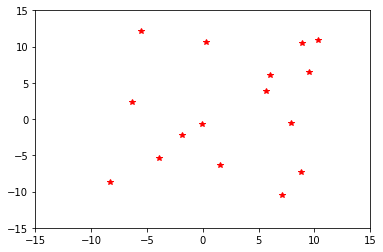

In [114]:
#Try an animation
fig, ax = plt.subplots()
ax.set_xlim((-15,15))
ax.set_ylim((-15,15))

cf = Rosenbrock(2)
opt = differentialEvol(2,16,cf.cost, init_range=12.)
pts, = ax.plot(opt.locs[0,:],opt.locs[1,:],'r*')

def animate(i):
    opt.iterate()
    pts.set_data(opt.locs[0,:],opt.locs[1,:])
    return (pts,)

anim = animation.FuncAnimation(fig, animate, frames=75,interval=20)

In [115]:
HTML(anim.to_jshtml())

In [116]:
opt.locs

array([[0.99996199, 1.00008856, 0.99992315, 0.99993567, 0.99992943,
        0.9999862 , 0.99997964, 1.00001747, 0.9999598 , 1.00000226,
        1.00002128, 1.00002635, 0.99996812, 0.99996606, 0.99995844,
        0.9999459 ],
       [0.999925  , 1.00017497, 0.99984853, 0.99987772, 0.99986119,
        0.99996994, 0.9999606 , 1.00002512, 0.99992474, 1.00000402,
        1.00004342, 1.00005961, 0.99994279, 0.99993485, 0.99991758,
        0.99989313]])